# Initial EDA

In [26]:
# Importing packages
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Creating new columns
### Adding day-of-the-week column

In [2]:
# Loading data
df = pd.read_csv('initial_data.csv')

# Converting Date column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Creating day of the week column
df['day_of_week'] = df['Date'].dt.day_name()

### Adding weekend Boolean column

In [3]:
# Define the function to find weekend values
def weekend(dow):
    if dow == 'Saturday' or dow == 'Sunday':
        return True
    else:
        return False
    
# Apply the function to the Age column using the apply() function
df['weekend'] = df['day_of_week'].apply(weekend)

### Adding season column

In [4]:
# Defining function to identify season
def get_season(date):
    month = date.month
    day = date.day
    if month in [3, 4, 5]:
        season = 'spring'
    elif month in [6, 7, 8]:
        season = 'summer'
    elif month in [9, 10, 11]:
        season = 'fall'
    else:
        season = 'winter'
    

    if month == 3 and day < 20:
        season = 'winter'
    elif month == 6 and day < 21:
        season = 'spring'
    elif month == 9 and day < 22:
        season = 'summer'
    elif month == 12 and day < 21:
        season = 'fall'
    
    return season

# Applying function and creating season column
df['season'] = df['Date'].apply(get_season)

### Adding holiday season column

In [5]:
# Define function to find some major holiday values 
def is_holiday_season(date):
    holidays = [
        datetime.date(date.year, 1, 1),   # New Year's Day
        datetime.date(date.year, 7, 4),   # Independence Day
        datetime.date(date.year, 12, 25), # Christmas Day
        datetime.date(date.year, 11, 4) + datetime.timedelta(weeks=3, days=3),  # Thanksgiving Day: 4th Thursday of November
        datetime.date(date.year, 5, 31) - datetime.timedelta(days=(datetime.date(date.year, 5, 31).weekday() + 1) % 7),  # Memorial Day: last Monday of May
        datetime.date(date.year, 9, 1) + datetime.timedelta(days=7-datetime.date(date.year, 9, 1).weekday()),  # Labor Day: first Monday of September
        datetime.date(date.year, 11, 11),  # Veteran's Day
        datetime.date(date.year, 1, 15) + datetime.timedelta(days=1-datetime.date(date.year, 1, 15).weekday())  # MLK Day: third Monday of January
    ]
    
    # Adding a three day buffer area around each holiday to create a "holiday season"
    for holiday in holidays:
        if (date.date() - datetime.timedelta(days=3)) <= holiday <= (date.date() + datetime.timedelta(days=3)):
            return True
    
    return False

# Create holiday season column
df['holiday_season'] = df['Date'].apply(is_holiday_season)

### Vaccine Announcement Column

In [6]:
# Define a list of unique announcement dates
announcement_dates = [
    "04/28/2023", "04/27/2023", "04/18/2023", "03/14/2023", "03/10/2023",
    "12/16/2022", "12/08/2022", "10/21/2022", "10/12/2022", "09/13/2022",
    "08/31/2022", "08/26/2022", "08/19/2022", "07/13/2022", "07/08/2022",
    "06/30/2022", "06/17/2022", "05/17/2022", "05/05/2022", "04/29/2022",
    "04/15/2022", "04/01/2022", "03/29/2022", "03/21/2022", "03/11/2022",
    "02/11/2022", "02/01/2022", "01/31/2022", "01/11/2022", "01/07/2022",
    "01/03/2022", "12/17/2021", "12/14/2021", "12/09/2021", "11/30/2021",
    "11/19/2021", "10/29/2021", "10/26/2021", "10/22/2021", "10/20/2021",
    "10/14/2021", "10/01/2021", "09/24/2021", "09/22/2021", "09/20/2021",
    "09/17/2021", "09/10/2021", "09/02/2021", "09/01/2021", "08/24/2021",
    "08/23/2021", "08/18/2021", "08/13/2021", "08/12/2021", "08/06/2021",
    "08/03/2021", "07/30/2021", "07/16/2021", "07/13/2021", "07/08/2021",
    "07/06/2021", "07/02/2021", "06/29/2021", "06/25/2021", "06/15/2021",
    "06/11/2021", "06/10/2021", "05/25/2021", "05/19/2021", "05/11/2021",
    "05/10/2021", "04/27/2021", "04/23/2021", "04/21/2021", "04/16/2021",
    "04/13/2021", "04/12/2021", "04/01/2021", "03/26/2021", "03/24/2021",
    "03/17/2021", "03/05/2021", "03/02/2021", "02/27/2021", "02/26/2021",
    "02/25/2021", "02/23/2021", "02/22/2021", "02/12/2021", "02/05/2021",
    "02/04/2021", "01/29/2021", "01/14/2021", "01/04/2021", "12/28/2020",
    "12/22/2020", "12/21/2020", "12/18/2020", "12/17/2020", "12/14/2020", "12/12/2020"
]

# Convert to datetime and deduplicate
announcement_dates = list(set([pd.to_datetime(date) for date in announcement_dates]))


# Check if the date in the dataset is within a week of any announcement dates
def near_announcement(date):
    for announcement in announcement_dates:
        if announcement <= date <= (announcement + pd.Timedelta(days=7)):
            return True
    return False

# Create the 'vax_announcement' column
df['vax_announcement'] = df['Date'].apply(near_announcement)


## Exploring Timetrends in Data

In [7]:
df.columns

Index(['Date', 'FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_Pct', 'Series_Complete_5Plus',
       'Series_Complete_5PlusPop_Pct', 'Series_Complete_5to17',
       'Series_Complete_5to17Pop_Pct', 'Series_Complete_12Plus',
       'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus',
       'Series_Complete_18PlusPop_Pct', 'Series_Complete_65Plus',
       'Series_Complete_65PlusPop_Pct', 'Booster_Doses',
       'Booster_Doses_Vax_Pct', 'Booster_Doses_5Plus',
       'Booster_Doses_5Plus_Vax

In [8]:
df.shape

(61592, 85)

In [33]:
# Getting Rid of Columns that are not percentages 

columns_to_drop = []
for column in df.columns:
    if 'pct' not in column and 'Pct' not in column and 'Recip' not in column and 'Census' not in column: 
        columns_to_drop.append(column)


        
values_remove = ['Date', 'SVI_CTGY', 'Metro_status', 'day_of_week', 
                       'weekend', 'season', 'holiday_season', 'vax_announcement']
for x in values_remove:
    columns_to_drop.remove(x)
    
    
# Dropping the columns from the df

df = df.drop(columns = columns_to_drop)
df = df.drop(columns = ['Administered_Dose1_Recip_5Plus', 'Administered_Dose1_Recip_12Plus',
                        'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_65Plus'])

In [34]:
df.shape

(61592, 61)

In [35]:
df.columns

Index(['Date', 'Recip_County', 'Recip_State', 'Completeness_pct',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_5PlusPop_Pct',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Pop_Pct',
       'Series_Complete_5PlusPop_Pct', 'Series_Complete_5to17Pop_Pct',
       'Series_Complete_12PlusPop_Pct', 'Series_Complete_18PlusPop_Pct',
       'Series_Complete_65PlusPop_Pct', 'Booster_Doses_Vax_Pct',
       'Booster_Doses_5Plus_Vax_Pct', 'Booster_Doses_12Plus_Vax_Pct',
       'Booster_Doses_18Plus_Vax_Pct', 'Booster_Doses_50Plus_Vax_Pct',
       'Booster_Doses_65Plus_Vax_Pct', 'Second_Booster_50Plus_Vax_Pct',
       'Second_Booster_65Plus_Vax_Pct', 'SVI_CTGY',
       'Series_Complete_Pop_Pct_SVI', 'Series_Complete_5PlusPop_Pct_SVI',
       'Series_Complete_5to17Pop_Pct_SVI', 'Series_Complete_12PlusPop_Pct_SVI',
       'Series_Comp

In [36]:
pred_var = 'Booster_Doses_Vax_Pct'

In [37]:
data_subset = df[['Booster_Doses_Vax_Pct', 'Date']]

In [38]:
filtered_df = data_subset[data_subset[pred_var].notna()]

min_value = filtered_df['Date'].min()

In [39]:
min_value

Timestamp('2021-12-15 00:00:00')

In [40]:
data_subset[data_subset['Date'] == min_value]

,Booster_Doses_Vax_Pct,Date
23690,36.4,2021-12-15
23691,31.6,2021-12-15
23692,36.7,2021-12-15
23693,33.6,2021-12-15
23694,29.7,2021-12-15
...,...,...
23788,34.6,2021-12-15
23789,34.8,2021-12-15
23790,32.0,2021-12-15
23791,33.2,2021-12-15


<AxesSubplot:title={'center':' Predictive variable over Years'}, xlabel='Date'>

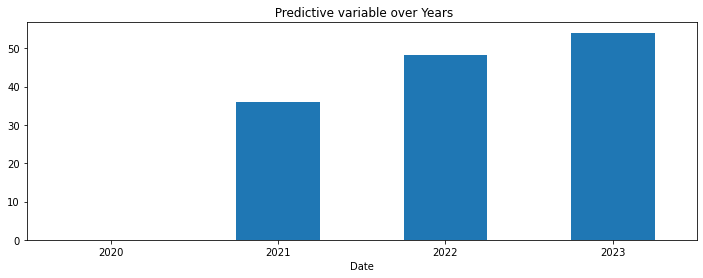

In [41]:
fig, axs = plt.subplots(figsize=(12, 4))
data_subset.groupby(data_subset["Date"].dt.year)[pred_var].mean().plot(
    kind='bar', rot=0, ax=axs, title = " Predictive variable over Years"
)


<AxesSubplot:title={'center':' Predictive variable over Months'}, xlabel='Date'>

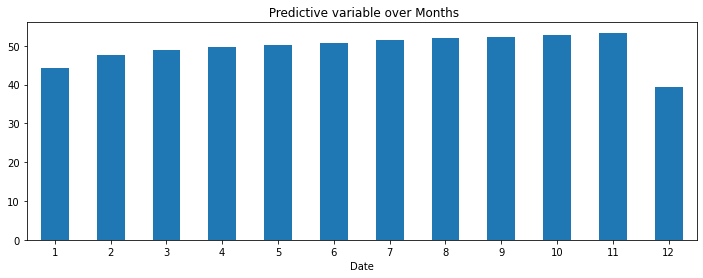

In [42]:
fig, axs = plt.subplots(figsize=(12, 4))
data_subset.groupby(data_subset["Date"].dt.month)[pred_var].mean().plot(
    kind='bar', rot=0, ax=axs, title = " Predictive variable over Months"
)

<AxesSubplot:title={'center':' Predictive variable over Days'}, xlabel='Date'>

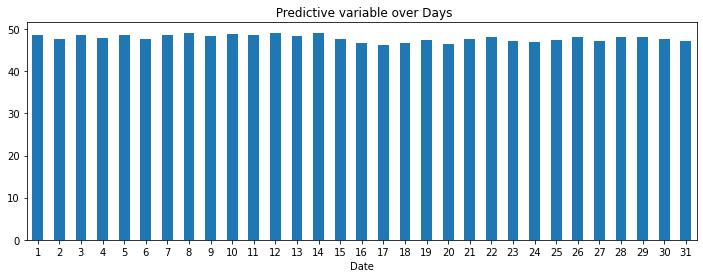

In [43]:
fig, axs = plt.subplots(figsize=(12, 4))
data_subset.groupby(data_subset["Date"].dt.day)[pred_var].mean().plot(
    kind='bar', rot=0, ax=axs, title = " Predictive variable over Days"
)

<AxesSubplot:title={'center':' Predictive variable over Days of the week'}, xlabel='day_of_week'>

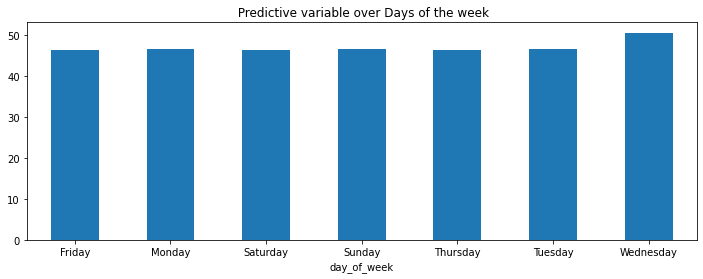

In [44]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["day_of_week"])[pred_var].mean().plot(
    kind='bar', rot=0, ax=axs, title = " Predictive variable over Days of the week"
)

<AxesSubplot:title={'center':' Predictive variable over seasons'}, xlabel='season'>

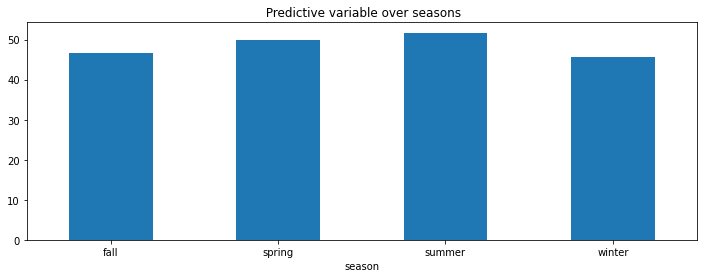

In [45]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["season"])[pred_var].mean().plot(
    kind='bar', rot=0, ax=axs, title = " Predictive variable over seasons"
)

<AxesSubplot:title={'center':' Predictive variable over dataset time period'}, xlabel='Date'>

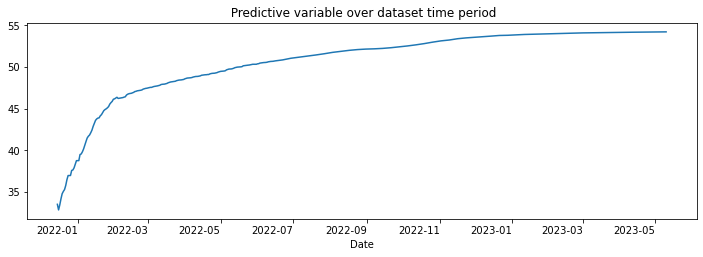

In [46]:
fig, axs = plt.subplots(figsize=(12, 4))
df.groupby(df["Date"])[pred_var].mean().plot(
    kind='line', rot=0, ax=axs, title = " Predictive variable over dataset time period"
)

In [47]:
df.describe()

,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18PlusPop_Pct,Administered_Dose1_Recip_65PlusPop_Pct,Series_Complete_Pop_Pct,Series_Complete_5PlusPop_Pct,Series_Complete_5to17Pop_Pct,...,Census2019,Census2019_5PlusPop,Census2019_5to17Pop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop,Bivalent_Booster_5Plus_Pop_Pct,Bivalent_Booster_12Plus_Pop_Pct,Bivalent_Booster_18Plus_Pop_Pct,Bivalent_Booster_65Plus_Pop_Pct
count,61592.000000,6.159200e+04,61452.000000,24374.000000,61452.000000,61452.000000,61452.000000,61452.000000,24374.000000,13464.000000,...,6.099600e+04,2.427600e+04,13464.000000,6.099600e+04,6.099600e+04,21522.000000,2652.000000,2652.000000,2652.000000,2652.000000
mean,92.289417,7.043617e+04,44.358306,61.420391,50.670447,53.027931,74.467589,37.564911,55.997702,26.856833,...,1.242335e+05,1.169107e+05,20303.343137,1.062530e+05,9.660731e+04,20031.686275,13.008597,14.104676,15.189555,36.796041
std,22.739325,3.429423e+05,20.188306,12.645298,22.716994,23.146154,27.026234,19.581313,11.593333,13.225520,...,5.208765e+05,4.895723e+05,82039.366293,4.458013e+05,4.076141e+05,78415.579989,3.962543,4.222162,4.456517,9.278828
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.500000,...,3.821000e+03,3.677000e+03,389.000000,3.408000e+03,3.152000e+03,925.000000,4.700000,5.000000,5.300000,13.100000
25%,97.700000,4.282000e+03,34.600000,55.100000,40.000000,42.900000,72.200000,26.500000,49.700000,16.900000,...,1.353700e+04,1.275700e+04,2166.000000,1.161000e+04,1.057000e+04,2813.000000,10.200000,11.100000,12.000000,30.300000
50%,97.800000,9.622000e+03,48.600000,61.100000,56.000000,58.900000,84.700000,41.300000,56.400000,25.250000,...,2.530250e+04,2.381950e+04,3669.500000,2.181700e+04,1.985950e+04,5359.000000,12.700000,13.700000,14.800000,36.400000
75%,98.200000,2.713025e+04,58.100000,68.000000,66.000000,68.700000,90.800000,52.200000,62.100000,33.600000,...,5.354400e+04,5.053800e+04,8905.000000,4.563600e+04,4.156400e+04,10426.000000,15.600000,16.900000,18.100000,43.225000
max,100.000000,4.335968e+06,92.900000,99.900000,95.000000,96.400000,100.000000,83.500000,99.900000,69.700000,...,5.150233e+06,4.840122e+06,803127.000000,4.409825e+06,4.036995e+06,776229.000000,26.500000,28.300000,29.800000,60.700000


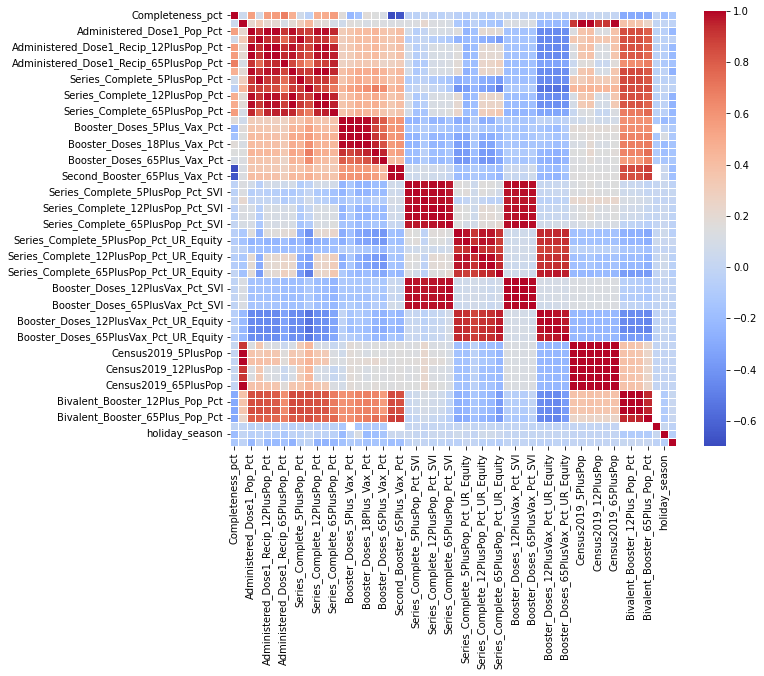

In [48]:
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)

# Show the heatmap
plt.show()

In [49]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation scores for the predictive variable 'TargetVariable'
correlation_scores = correlation_matrix[pred_var].sort_values(ascending=False)


print(correlation_scores)

Booster_Doses_Vax_Pct                      1.000000
Booster_Doses_5Plus_Vax_Pct                0.999678
Booster_Doses_12Plus_Vax_Pct               0.991628
Booster_Doses_18Plus_Vax_Pct               0.987330
Booster_Doses_50Plus_Vax_Pct               0.916613
Booster_Doses_65Plus_Vax_Pct               0.795255
Bivalent_Booster_5Plus_Pop_Pct             0.610223
Bivalent_Booster_65Plus_Pop_Pct            0.608544
Bivalent_Booster_12Plus_Pop_Pct            0.608102
Bivalent_Booster_18Plus_Pop_Pct            0.605739
Second_Booster_65Plus_Vax_Pct              0.595773
Second_Booster_50Plus_Vax_Pct              0.577949
Series_Complete_5to17Pop_Pct               0.455965
Series_Complete_Pop_Pct                    0.387220
Series_Complete_65PlusPop_Pct              0.364725
Series_Complete_12PlusPop_Pct              0.362597
Series_Complete_18PlusPop_Pct              0.356771
Series_Complete_5PlusPop_Pct               0.353051
Administered_Dose1_Pop_Pct                 0.313638
Administered

## Null Values

In [68]:
null = df.isna().sum()

null[null>0]

Administered_Dose1_Pop_Pct                   140
Administered_Dose1_Recip_5PlusPop_Pct      37218
Administered_Dose1_Recip_12PlusPop_Pct       140
Administered_Dose1_Recip_18PlusPop_Pct       140
Administered_Dose1_Recip_65PlusPop_Pct       140
Series_Complete_Pop_Pct                      140
Series_Complete_5PlusPop_Pct               37218
Series_Complete_5to17Pop_Pct               48128
Series_Complete_12PlusPop_Pct                140
Series_Complete_18PlusPop_Pct                140
Series_Complete_65PlusPop_Pct                140
Booster_Doses_Vax_Pct                      37799
Booster_Doses_5Plus_Vax_Pct                56957
Booster_Doses_12Plus_Vax_Pct               42228
Booster_Doses_18Plus_Vax_Pct               37799
Booster_Doses_50Plus_Vax_Pct               37799
Booster_Doses_65Plus_Vax_Pct               37799
Second_Booster_50Plus_Vax_Pct              57266
Second_Booster_65Plus_Vax_Pct              57266
SVI_CTGY                                     596
Series_Complete_Pop_

In [62]:
# finding non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number'])
#print(non_numeric_columns)

In [70]:
# Next, we wanted used VIF to see if any of the variables have a high linear correlation
X = df.loc[:, df.columns != pred_var]
X = X.drop(columns = ['Recip_County', 'Recip_State', 'Date', 'day_of_week', 'weekend', 'season', 
                      'holiday_season', 'vax_announcement', 'SVI_CTGY', 'Metro_status']) #dropping non-numeric columns
#X.columns[1:]

#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant

#X = add_constant(X)
#vif_data = pd.DataFrame()
#vif_data["feature"] = X.columns

#for i in range(len(X.columns)):
   # vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

#vif_data # all of the variables (except const) have VIF values of less than 5, indicating a small amount of collinearity